In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium #for using maps
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import seaborn as sns
pio.templates.default = "plotly_white"


metro_data = pd.read_csv("Delhi-Metro-Network.csv")



In [ ]:
print(metro_data.head())

   Station ID         Station Name  Distance from Start (km)          Line  \
0           1             Jhil Mil                      10.3      Red line   
1           2  Welcome [Conn: Red]                      46.8     Pink line   
2           3          DLF Phase 3                      10.0   Rapid Metro   
3           4           Okhla NSIC                      23.8  Magenta line   
4           5           Dwarka Mor                      10.2     Blue line   

  Opening Date Station Layout   Latitude  Longitude  
0   2008-04-06       Elevated  28.675790  77.312390  
1   2018-10-31       Elevated  28.671800  77.277560  
2   2013-11-14       Elevated  28.493600  77.093500  
3   2017-12-25       Elevated  28.554483  77.264849  
4   2005-12-30       Elevated  28.619320  77.033260  


In [ ]:
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [ ]:
null_values = metro_data.isnull().sum()
null_values

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [ ]:
metro_data["Opening Date"] = pd.to_datetime(metro_data["Opening Date"])

metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Station ID                285 non-null    int64         
 1   Station Name              285 non-null    object        
 2   Distance from Start (km)  285 non-null    float64       
 3   Line                      285 non-null    object        
 4   Opening Date              285 non-null    datetime64[ns]
 5   Station Layout            285 non-null    object        
 6   Latitude                  285 non-null    float64       
 7   Longitude                 285 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 17.9+ KB


In [ ]:
colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

delhi_map_with_line_tooltip

In [ ]:
for index, row in metro_data.iterrows():
    line = row['Line']
    color = colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    popup_text = row['Station Name']
    tooltip_text = "{}, {}".format(row['Station Name'], line)

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,  #to create a popup on the marker
        tooltip=tooltip_text,  #to create a tooltip to show the station name
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)

delhi_map_with_line_tooltip

In [ ]:
# number of stations opened each year
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year

# counting the number of stations opened each year
stations_per_year = metro_data['Opening Year'].value_counts().sort_index()

stations_per_year_df = stations_per_year.reset_index()
stations_per_year_df.columns = ['Year', 'Number of Stations']

fig = px.bar(stations_per_year_df, x='Year', y='Number of Stations',
             title="Number of Metro Stations Opened Each Year in Delhi",
             labels={'Year': 'Year', 'Number of Stations': 'Number of Stations Opened'})

fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickmode='linear'),
                  yaxis=dict(title='Number of Stations Opened'),
                  xaxis_title="Year")

fig.show()

In [ ]:
stations_per_line = metro_data['Line'].value_counts()

# calculating the total distance of each metro line (max distance from start)
total_distance_per_line = metro_data.groupby('Line')['Distance from Start (km)'].max()

avg_distance_per_line = total_distance_per_line / (stations_per_line - 1)

line_analysis = pd.DataFrame({
    'Line': stations_per_line.index,
    'Number of Stations': stations_per_line.values,
    'Average Distance Between Stations (km)': avg_distance_per_line
})

# sorting the DataFrame by the number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

line_analysis.reset_index(drop=True, inplace=True)
print(line_analysis)

                 Line  Number of Stations  \
0           Blue line                  49   
1           Pink line                  38   
2         Yellow line                  37   
3         Voilet line                  34   
4            Red line                  29   
5        Magenta line                  25   
6           Aqua line                  21   
7          Green line                  21   
8         Rapid Metro                  11   
9    Blue line branch                   8   
10        Orange line                   6   
11          Gray line                   3   
12  Green line branch                   3   

    Average Distance Between Stations (km)  
0                                 1.355000  
1                                 1.097917  
2                                 1.157143  
3                                 1.950000  
4                                 1.240000  
5                                 1.050000  
6                                 1.379167  
7        

<ipython-input-49-c8de1e8919cb>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-49-c8de1e8919cb>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




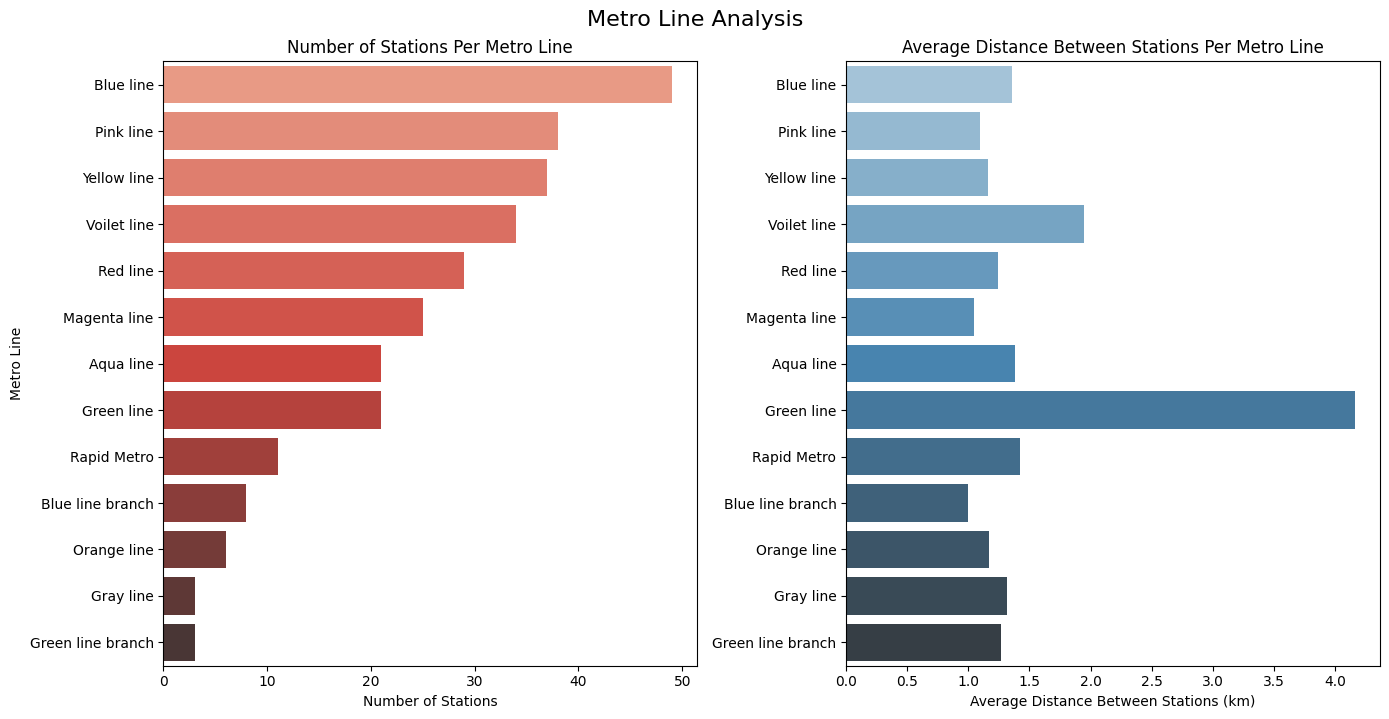

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot for Number of Stations per Line
sns.barplot(data=line_analysis, y='Line', x='Number of Stations', ax=axes[0], palette='Reds_d')
axes[0].set_title('Number of Stations Per Metro Line')
axes[0].set_xlabel('Number of Stations')
axes[0].set_ylabel('Metro Line')

# Plot for Average Distance Between Stations
sns.barplot(data=line_analysis, y='Line', x='Average Distance Between Stations (km)', ax=axes[1], palette='Blues_d')
axes[1].set_title('Average Distance Between Stations Per Metro Line')
axes[1].set_xlabel('Average Distance Between Stations (km)')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.suptitle('Metro Line Analysis', fontsize=16, y=1.02)

# Show the plot
plt.show()
